In [20]:
%matplotlib inline

In [21]:
import dask.array as da
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from dask.dot import dot_graph

In [22]:
# Random 3D array (drop-in NumPy replacement)
x = da.random.normal(10, 0.1, size=(100, 100, 100), chunks=(50, 50, 50))
x.dask

{('x_4', 0, 0, 0): (<function dask.array.random._apply_random>,
  'normal',
  568799221,
  (50, 50, 50),
  (10, 0.1),
  {}),
 ('x_4', 0, 0, 1): (<function dask.array.random._apply_random>,
  'normal',
  181963864,
  (50, 50, 50),
  (10, 0.1),
  {}),
 ('x_4', 0, 1, 0): (<function dask.array.random._apply_random>,
  'normal',
  1544850035,
  (50, 50, 50),
  (10, 0.1),
  {}),
 ('x_4', 0, 1, 1): (<function dask.array.random._apply_random>,
  'normal',
  53363564,
  (50, 50, 50),
  (10, 0.1),
  {}),
 ('x_4', 1, 0, 0): (<function dask.array.random._apply_random>,
  'normal',
  840452299,
  (50, 50, 50),
  (10, 0.1),
  {}),
 ('x_4', 1, 0, 1): (<function dask.array.random._apply_random>,
  'normal',
  1857557122,
  (50, 50, 50),
  (10, 0.1),
  {}),
 ('x_4', 1, 1, 0): (<function dask.array.random._apply_random>,
  'normal',
  2061419646,
  (50, 50, 50),
  (10, 0.1),
  {}),
 ('x_4', 1, 1, 1): (<function dask.array.random._apply_random>,
  'normal',
  676043173,
  (50, 50, 50),
  (10, 0.1),
  {})

In [23]:
# Squash to 2D (DO not compute!)
mean = x.mean(axis=0)
mean.dask

{('x_4', 0, 0, 0): (<function dask.array.random._apply_random>,
  'normal',
  568799221,
  (50, 50, 50),
  (10, 0.1),
  {}),
 ('x_4', 0, 0, 1): (<function dask.array.random._apply_random>,
  'normal',
  181963864,
  (50, 50, 50),
  (10, 0.1),
  {}),
 ('x_4', 0, 1, 0): (<function dask.array.random._apply_random>,
  'normal',
  1544850035,
  (50, 50, 50),
  (10, 0.1),
  {}),
 ('x_4', 0, 1, 1): (<function dask.array.random._apply_random>,
  'normal',
  53363564,
  (50, 50, 50),
  (10, 0.1),
  {}),
 ('x_4', 1, 0, 0): (<function dask.array.random._apply_random>,
  'normal',
  840452299,
  (50, 50, 50),
  (10, 0.1),
  {}),
 ('x_4', 1, 0, 1): (<function dask.array.random._apply_random>,
  'normal',
  1857557122,
  (50, 50, 50),
  (10, 0.1),
  {}),
 ('x_4', 1, 1, 0): (<function dask.array.random._apply_random>,
  'normal',
  2061419646,
  (50, 50, 50),
  (10, 0.1),
  {}),
 ('x_4', 1, 1, 1): (<function dask.array.random._apply_random>,
  'normal',
  676043173,
  (50, 50, 50),
  (10, 0.1),
  {})

Writing graph to mydask.pdf


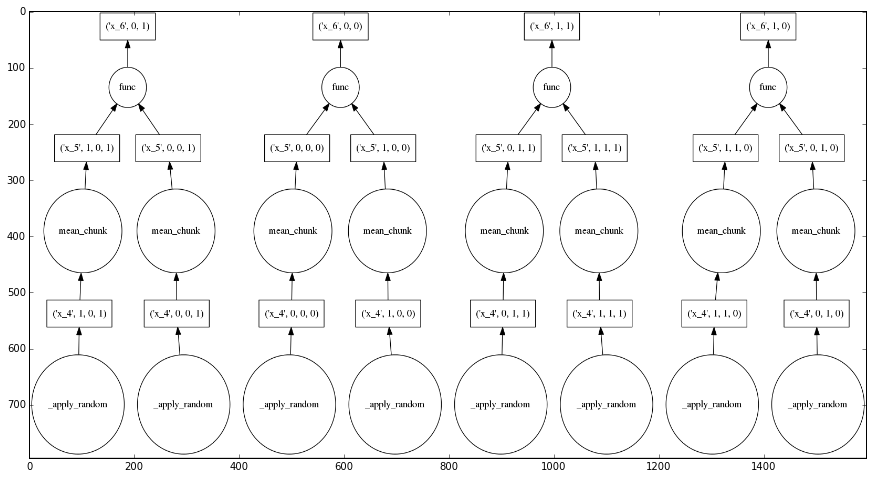

In [24]:
# See the plot!
dot_graph(mean.dask)
image = mpimg.imread("mydask.png")
plt.figure(figsize = (15,8))
plt.imshow(image, aspect='auto')

In [25]:
# Now do the computation
res = mean.compute()
res.dtype, res.shape

(dtype('float64'), (100, 100))

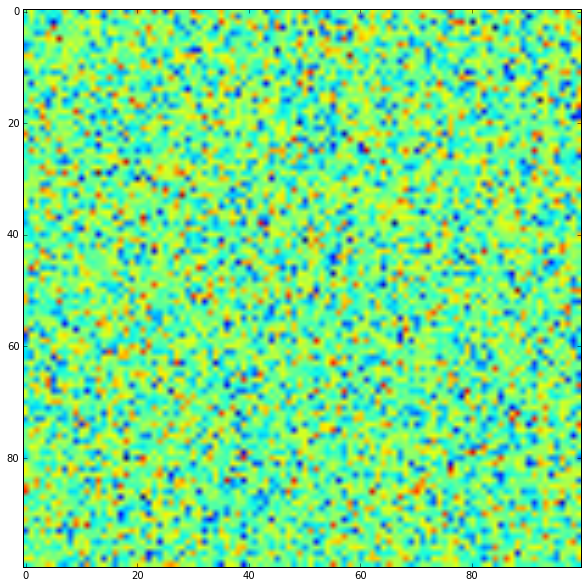

In [26]:
plt.figure(figsize = (10,10))
plt.imshow(res)